# Proyecto integrador - TC5035

## Christopher Valdez Cantu  #A01793549


In [1]:
#pip install clean-text

In [1]:
from cleantext import clean
from sklearn.feature_extraction.text import TfidfVectorizer
import ftfy
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from datetime import datetime

# Objetivos del proyecto

Para este proyecto se utilizarán cuatro conjuntos de datos, uno general y tres específicos. El primero será abordado en la primera parte, y los otros tres se tratarán en la segunda parte. Los cuatro conjuntos de datos se recopilaron utilizando web scraping para obtener un listado de productos rentables en Amazon. Todos los productos en el conjunto de datos han tenido un buen desempeño en ventas y buenas reseñas.

El primer conjunto de datos incluye productos de todos los sectores, y el objetivo de esta primera parte del proyecto es identificar al menos seis nichos rentables dentro de él.

Por otro lado, los otros tres conjuntos de datos están más enfocados en productos específicos de cada industria. En estos casos, el objetivo es encontrar al menos cuatro nichos rentables, más específicos, dentro de cada una de estas industrias.


# Parte 1 - Busqueda General

## Lectura de datos

In [2]:

# Leer el archivo CSV
Busqueda_1 = pd.read_csv('Data/Busqueda_1.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

Busqueda_1

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B0BY7R11JB,Rebar-Stakes-12-Inch-Galvanized J Hook Rebar ...,QNLONG,"Patio, Lawn & Garden","$15,001.20","1,080",$13.89,N.A.,N.A.,"1,381",43.000000,6,1,05/27/2023,Amazon,4.8,N.A.,N.A.,N.A.
1,B0BYZPBF3L,CozeCube Light Beige Bath mats for Bathroom No...,CozeCube,Home & Kitchen,"$15,001.35","1,365",$24.99,N.A.,N.A.,"23,336",43.135135,7,2,03/19/2023,taianshiyujiadianzishangmaoyouxiangongsi,3.9,N.A.,N.A.,N.A.
2,B0C3GRT1Q3,PURPLE LADYBUG Scratch Art for Kids - Party Fa...,PURPLE LADYBUG,Toys & Games,"$15,004.31","1,669",$8.99,N.A.,N.A.,"7,824",5.000000,6,1,06/28/2023,Amazon,5.0,N.A.,N.A.,N.A.
3,B0CL9X56BK,Cordless Long Handle Replacement Brush Heads f...,Bilim,Health & Household,"$15,004.98","1,502",$9.99,N.A.,N.A.,N.A.,21.000000,5,1,06/18/2023,Amazon,5.0,N.A.,N.A.,N.A.
4,B0C1FY79XG,Fitwarm Cheerleader Dog Costume Sporty Cheer ...,Fitwarm,Pet Supplies,"$15,004.99","1,001",$14.99,$5.79,$9.20,"5,053",30.000000,6,1,04/03/2023,Amazon,4.3,"12.87"" x 9.80"" x 0.87""",Large standard-size,2.4 lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,B0CHMK5L2R,INPAKSA Women's Slippers Platform Mini Boots S...,INPAKSA,"Clothing, Shoes & Jewelry","$520,217.72","11,314",$45.98,N.A.,N.A.,"1,113",32.000000,7,1,09/07/2023,INPAKSAS,3.9,N.A.,N.A.,N.A.
10200,B07QQX6JVL,SEPARO Spandex Table Cover Fitted Rectangular ...,SEPARO,Kitchen & Dining,"$520,702.56","9,648",$53.97,N.A.,N.A.,524,2.000000,7,1,06/24/2023,Amazon,5.0,N.A.,N.A.,N.A.
10201,B0BLJJNFYN,HYC00 Travel Duffel Bag Sports Tote Gym/Should...,HYC00,"Clothing, Shoes & Jewelry","$520,906.40","13,360",$38.99,$12.58,$26.41,"74,253",12.000000,7,3,12/17/2022,Amazon Warehouse,4.4,"12.99"" x 10.28"" x 4.33""",Large standard-size,2.05 lbs
10202,B0CFKGY6XH,FREE VILLAGE Ice Makers Countertop Nugget Cube...,FREE VILLAGE,Appliances,"$521,539.94","2,006",$259.99,N.A.,N.A.,"2,907",10.000000,7,1,08/15/2023,progressUS,3.5,"11.30"" x 8.66"" x 12.68""",N.A.,N.A.


## Limpieza de los datos

In [3]:
Busqueda_1 = Busqueda_1.drop_duplicates(subset='ASIN')

In [4]:
Busqueda_1 = Busqueda_1.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [5]:
import pandas as pd
import ftfy

# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    Busqueda_1[col] = Busqueda_1[col].astype(str).apply(clean_text)

    
Busqueda_1.replace("N.A.", np.nan, inplace=True)
Busqueda_1.replace("na", np.nan, inplace=True)


In [6]:
# Verificar valores faltantes
missing_values = Busqueda_1.isnull().sum()
print("Datos faltantes por columna:\n", missing_values)

Datos faltantes por columna:
 Product Name             0
Brand                    3
Category                 0
Est. Monthly Revenue    53
Est. Monthly Sales      53
Price                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Rating                   0
dtype: int64


## Cambiar tipos de datos

In [7]:
print(Busqueda_1.dtypes)

Product Name             object
Brand                    object
Category                 object
Est. Monthly Revenue     object
Est. Monthly Sales       object
Price                    object
Reviews                 float64
LQS                       int64
Sellers                   int64
Date First Available     object
Rating                  float64
dtype: object


In [8]:
Busqueda_1['Rating'] = Busqueda_1['Rating'].round(2)
Busqueda_1 = Busqueda_1.astype({'Reviews': 'float64', 'Reviews': 'int64'})

Busqueda_1['Est. Monthly Revenue'] = Busqueda_1['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
Busqueda_1['Est. Monthly Sales'] = Busqueda_1['Est. Monthly Sales'].str.replace(',', '')
Busqueda_1['Price'] = Busqueda_1['Price'].str.replace('$', '').str.replace(',', '')

Busqueda_1['Est. Monthly Sales'] = pd.to_numeric(Busqueda_1['Est. Monthly Sales'], errors='coerce')
Busqueda_1['Price'] = pd.to_numeric(Busqueda_1['Price'], errors='coerce')
Busqueda_1['Est. Monthly Revenue'] = pd.to_numeric(Busqueda_1['Est. Monthly Revenue'], errors='coerce')

C:\Users\Chris\AppData\Local\Temp\ipykernel_9380\2323929740.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_1['Est. Monthly Revenue'] = Busqueda_1['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
C:\Users\Chris\AppData\Local\Temp\ipykernel_9380\2323929740.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_1['Price'] = Busqueda_1['Price'].str.replace('$', '').str.replace(',', '')


## Calcular tiempo en el mercado por producto

In [9]:
# Convertir la columna "Date First Available" a formato de fecha
Busqueda_1['Date First Available'] = pd.to_datetime(Busqueda_1['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
Busqueda_1['Time in Market (days)'] = (today - Busqueda_1['Date First Available']).dt.days

## drop NA

In [10]:
Busqueda_1 = Busqueda_1.dropna(subset=['Est. Monthly Sales'])
Busqueda_1 = Busqueda_1.dropna(subset=['Brand'])

In [11]:
# Verificar valores faltantes
missing_values = Busqueda_1.isnull().sum()
print("Datos faltantes por columna:\n", missing_values)

Datos faltantes por columna:
 Product Name             0
Brand                    0
Category                 0
Est. Monthly Revenue     0
Est. Monthly Sales       0
Price                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Rating                   0
Time in Market (days)    0
dtype: int64


## Ordenar columnas

In [12]:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
Busqueda_1 = Busqueda_1[ordered_columns]


In [13]:
#pd.set_option('display.max_rows', None)
#pd.set_option('max_colwidth', None)
Busqueda_1

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue
0,rebarstakes12inchgalvanized j hook rebar stake...,patio lawn garden,qnlong,43,6,1,2023-05-27,174,4.8,13.89,1080.0,15001.20
1,cozecube light beige bath mats for bathroom no...,home kitchen,cozecube,43,7,2,2023-03-19,243,3.9,24.99,1365.0,15001.35
2,purple ladybug scratch art for kids party favo...,toys games,purple ladybug,5,6,1,2023-06-28,142,5.0,8.99,1669.0,15004.31
3,cordless long handle replacement brush heads f...,health household,bilim,21,5,1,2023-06-18,152,5.0,9.99,1502.0,15004.98
4,fitwarm cheerleader dog costume sporty cheer d...,pet supplies,fitwarm,30,6,1,2023-04-03,228,4.3,14.99,1001.0,15004.99
...,...,...,...,...,...,...,...,...,...,...,...,...
9899,inpaksa womens slippers platform mini boots sh...,clothing shoes jewelry,inpaksa,32,7,1,2023-09-07,71,3.9,45.98,11314.0,520217.72
9900,separo spandex table cover fitted rectangular ...,kitchen dining,separo,2,7,1,2023-06-24,146,5.0,53.97,9648.0,520702.56
9901,hyc00 travel duffel bag sports tote gymshoulde...,clothing shoes jewelry,hyc00,12,7,3,2022-12-17,335,4.4,38.99,13360.0,520906.40
9902,free village ice makers countertop nugget cube...,appliances,free village,10,7,1,2023-08-15,94,3.5,259.99,2006.0,521539.94


## Extracción de Palabras Clave

### Agrupación 

In [14]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list


In [15]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(Busqueda_1['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
Busqueda_1['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
Busqueda_1['Cluster'] = km.fit_predict(tfidf_matrix)

C:\Users\Chris\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
Busqueda_1

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
0,rebarstakes12inchgalvanized j hook rebar stake...,patio lawn garden,qnlong,43,6,1,2023-05-27,174,4.8,13.89,1080.0,15001.20,"[stakes, turf, antirust, landscape, tent, grou...",6
1,cozecube light beige bath mats for bathroom no...,home kitchen,cozecube,43,7,2,2023-03-19,243,3.9,24.99,1365.0,15001.35,"[rugs, bath, bathroom, shag, area, mats, micro...",7
2,purple ladybug scratch art for kids party favo...,toys games,purple ladybug,5,6,1,2023-06-28,142,5.0,8.99,1669.0,15004.31,"[teen, crafts, ladybug, stuff, girls, scratch,...",1
3,cordless long handle replacement brush heads f...,health household,bilim,21,5,1,2023-06-18,152,5.0,9.99,1502.0,15004.98,"[dome, spin, adapter, heads, scrubber, corner,...",6
4,fitwarm cheerleader dog costume sporty cheer d...,pet supplies,fitwarm,30,6,1,2023-04-03,228,4.3,14.99,1001.0,15004.99,"[dog, sporty, cheer, cheerleader, outfits, pet...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,inpaksa womens slippers platform mini boots sh...,clothing shoes jewelry,inpaksa,32,7,1,2023-09-07,71,3.9,45.98,11314.0,520217.72,"[boot, slippers, antislip, fur, lined, platfor...",4
9900,separo spandex table cover fitted rectangular ...,kitchen dining,separo,2,7,1,2023-06-24,146,5.0,53.97,9648.0,520702.56,"[tablecloth, wrinklefree, banquet, weddings, r...",6
9901,hyc00 travel duffel bag sports tote gymshoulde...,clothing shoes jewelry,hyc00,12,7,3,2022-12-17,335,4.4,38.99,13360.0,520906.40,"[bag, pocket, duffel, weekender, laptop, overn...",1
9902,free village ice makers countertop nugget cube...,appliances,free village,10,7,1,2023-08-15,94,3.5,259.99,2006.0,521539.94,"[ice, nugget, chewy, village, operation, selfc...",6


In [17]:
# Identificación de Nichos Rentables
cluster_summary = Busqueda_1.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary)


         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0                46731.700127  4.611297           316
1                51315.587402  4.469718           639
2                69307.461588  4.274665           403
3                44014.276674  4.248820           466
4                83292.994531  4.151458           384
5                81742.200638  4.134150          1176
6                76927.939222  4.330239          5395
7                84616.048709  4.337268           798


In [18]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:  # Top 5 palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 baby
 toddler
 girls
 place
 childrens
 sleeve
 newborn
 months
 long
 infant
 clothes
 girl
 graphic
 cotton
 boy
 boys
 tshirt
 gymboree
 pants
 fall


Cluster 1:
 bag
 gifts
 toys
 kids
 birthday
 girls
 boys
 gift
 women
 christmas
 travel
 old
 toy
 bags
 party
 year
 crossbody
 makeup
 ages
 learning


Cluster 2:
 costume
 halloween
 cosplay
 dress
 girls
 women
 party
 costumes
 wig
 kids
 adult
 outfit
 accessories
 princess
 set
 headband
 men
 renaissance
 hat
 outfits


Cluster 3:
 halloween
 decorations
 lights
 outdoor
 decor
 party
 yard
 indoor
 pumpkin
 spider
 decoration
 led
 garden
 ghost
 scary
 lawn
 candles
 skeleton
 home
 hanging


Cluster 4:
 shoes
 boots
 toe
 womens
 slip
 sandals
 sneakers
 ankle
 walking
 comfortable
 women
 heel
 lightweight
 platform
 mens
 chunky
 dress
 casual
 heels
 low


Cluster 5:
 womens
 sleeve
 mens
 tops
 casual
 women
 long
 shirts
 shirt
 short
 pullover
 dress
 pants
 jacket
 neck
 psd
 fit


## Definición de nichos en base a las palabras clave por cluster

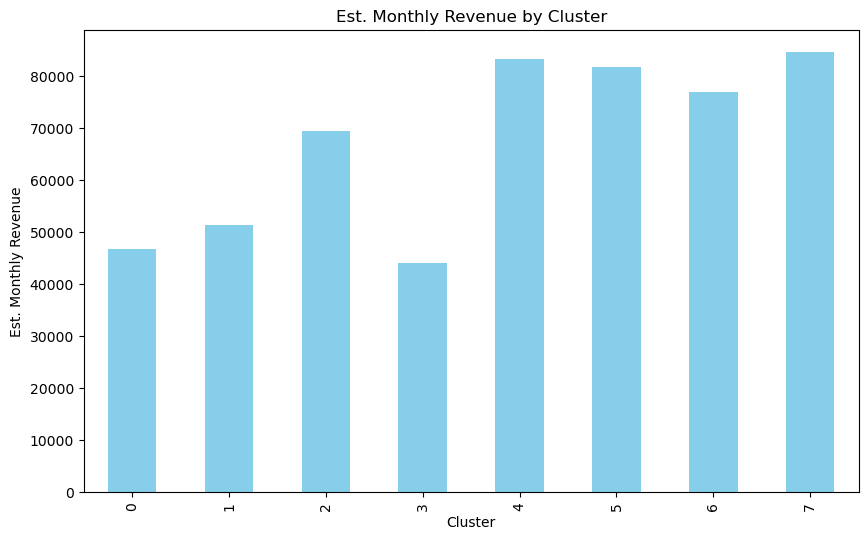

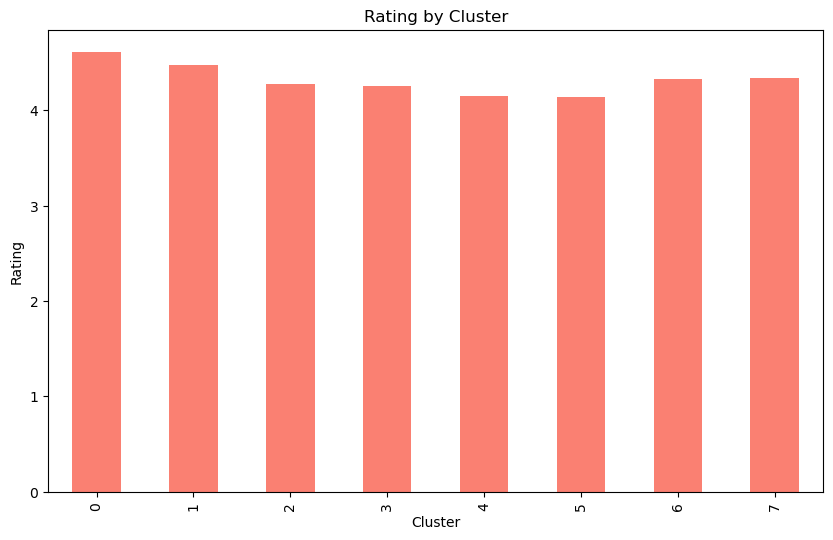

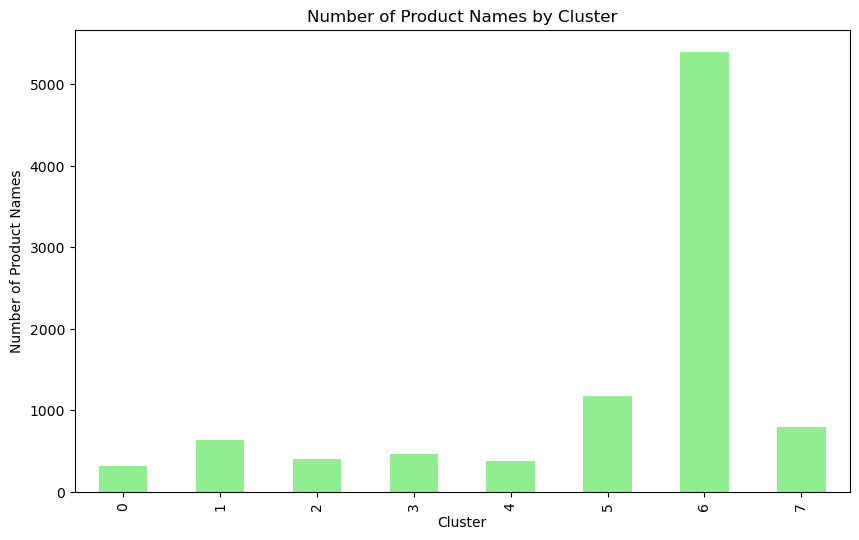

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()


## Análisis de Nichos generales 

### Cluster 0 - Ropa Infantil y para Bebés
- **Nicho:** Ropa cómoda y de calidad para bebés y niños pequeños.
- **Mercado Objetivo:** Padres que buscan vestimenta adecuada para sus hijos.

### Cluster 1 - Juguetes y Regalos para Niños
- **Nicho:** Juguetes y regalos para niños, adecuados para cumpleaños y ocasiones especiales.
- **Mercado Objetivo:** Padres y familiares en busca de regalos prácticos y divertidos.

### Cluster 2 - Disfraces y Accesorios para Fiestas
- **Nicho:** Disfraces y accesorios para fiestas temáticas y eventos.
- **Mercado Objetivo:** Individuos y familias que disfrutan de celebraciones temáticas.

### Cluster 3 - Decoraciones para Halloween y Fiestas
- **Nicho:** Artículos decorativos para Halloween y otras fiestas.
- **Mercado Objetivo:** Personas que buscan crear ambientes festivos en sus hogares.

### Cluster 4 - Calzado Versátil para Mujeres y Hombres
- **Nicho:** Variedad de calzados para distintas ocasiones y estilos.
- **Mercado Objetivo:** Consumidores en busca de comodidad y estilo.

### Cluster 5 - Ropa Casual y Deportiva
- **Nicho:** Ropa casual y deportiva para uso diario y actividades físicas.
- **Mercado Objetivo:** Personas que buscan confort y versatilidad en su vestuario.

### Cluster 6 - Artículos de Belleza y Cuidado Personal
- **Nicho:** Productos para el cuidado del cabello, la piel, uñas y hogar.
- **Mercado Objetivo:** Interesados en el cuidado personal y la decoración del hogar.

### Cluster 7 - Soluciones de Almacenamiento y Organización
- **Nicho:** Productos para optimizar el espacio y el orden en el hogar.
- **Mercado Objetivo:** Individuos interesados en mejorar la organización de sus espacios.



## Ejemplo de cluster 9 

In [20]:
pd.set_option('display.max_colwidth', None)
Busqueda_1.loc[Busqueda_1['Cluster'] == 7].head(50)


,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
1,cozecube light beige bath mats for bathroom non slip ultra soft fluffy shag bath rugs for bathroom washable plush microfiber area rugs for bedroom 24 x 16,home kitchen,cozecube,43,7,2,2023-03-19,243,3.90,24.99,1365.0,15001.35,"[rugs, bath, bathroom, shag, area, mats, microfiber, beige, fluffy, non]",7
4,fitwarm cheerleader dog costume sporty cheer dog dress for small dogs girl pet clothes cat outfits pink white large,pet supplies,fitwarm,30,6,1,2023-04-03,228,4.30,14.99,1001.0,15004.99,"[dog, sporty, cheer, cheerleader, outfits, pet, dogs, cat, girl, clothes]",7
7,aiitle no pull dog vest harness all weather breathable mesh reflective stripes adjustable escape proof pet outdoor harnesses for medium dogs black m,pet supplies,aiitle,18,7,1,2023-07-16,124,4.42,11.99,1252.0,15011.48,"[escape, stripes, harness, weather, reflective, pull, vest, proof, mesh, breathable]",7
63,100 pcs kitchen garbage bags and trash bag 4 gallon blue 45x60cm kitchen trash bags with handles for bathroom trash bags small trash bags contractor bags 100 blue 45x60,health household,yansanido,39,7,1,2023-06-06,164,4.10,7.99,1891.0,15109.09,"[trash, bags, kitchen, 100, blue, garbage, gallon, handles, bathroom, small]",7
126,jampayang dog sweater 3 pack dog sweaters for small dogs or cats girl or boy warm dog clothes shirt coat for winter christmas pink purple rose red xxsmall,pet supplies,jampayang,25,6,1,2023-06-14,156,4.60,13.99,1089.0,15235.11,"[dog, sweaters, cats, rose, coat, sweater, boy, warm, purple, dogs]",7
129,dog muzzle soft nylon muzzle for small medium large dogs labrador german shepherd chihuahua air mesh breathable drinkable adjustable loop antidropping pets muzzle for biting barking chewing green m,pet supplies,wanropes,40,7,1,2023-08-06,103,4.80,13.99,1387.0,15243.13,"[muzzle, chihuahua, biting, chewing, german, barking, loop, nylon, pets, mesh]",7
166,large adhesive hooks 22ibmax waterproof and rustproof wall hooks for hanging heavy duty stainless steel towel and coats hooks to use inside kitchen bathroom home and office asia black 8pcs,home kitchen,titchet,11,6,1,2023-07-09,131,3.10,16.34,1179.0,15315.21,"[hooks, 8pcs, rustproof, inside, coats, towel, adhesive, use, duty, stainless]",7
170,12pcs rug grippersnon slip rug padsreusable and washable rug gripper for area rugs carpet pads rug corner gripper for hardwood floorsarea rugs flat keeping your rug in place making corner flat,home kitchen,jyconvsto97,47,7,6,2023-06-16,154,3.90,7.99,1918.0,15324.82,"[rug, gripper, corner, rugs, flat, 12pcs, hardwood, area, making, carpet]",7
181,aitime traveling jewelry holder portable ring holder keychain sports jewelry storage box case ring organizer container with protective sponge blue,clothing shoes jewelry,aitime,1,6,1,2023-08-11,98,2.00,13.99,1098.0,15361.02,"[ring, jewelry, holder, traveling, protective, sponge, keychain, container, sports, case]",7
189,halloween dog collar bow mr chubbyface cute boy girl pumpkin and ghost dog collars with bowtie for puppy small medium large dogs,pet supplies,mr chubbyface,8,6,1,2023-08-22,87,4.78,16.99,1027.0,15394.73,"[dog, mr, collars, bowtie, bow, puppy, collar, ghost, boy, dogs]",7


# PART 2 - Busquedas filtradas

## Busqueda 2 - Maquillaje

In [21]:
# Leer el archivo CSV
Busqueda_2 = pd.read_csv('Data/Busqueda_2.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

Busqueda_2

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B0BHSRXS2T,(5+5) Powder Puff Makeup Sponge Blender Beauty Face Triangle Makeup Cosmetic Puff Latext-free Makeup Wedge Foundation Sponge Blender to Make Up Tools Applicator Sponges (black),YEOTWIN,Beauty & Personal Care,"$9,073.02","1,298",$6.99,$4.10,$2.89,"10,521",987,6,1,04/25/2023,Amazon,4.5,"5.43"" x 4.65"" x 2.20""",Large standard-size,2.15 lbs
1,B08CMVXB19,(6Pack) MAX Makeup Cherimoya Lip Polish Coconut Oil Clear Gloss (2Original+2Coconut+2Honey),Cherimoya,Beauty & Personal Care,"$11,757.78","1,574",$7.90,$3.52,$4.38,"10,332",2299.2,6,9,10/29/2019,Amazon,4.4,"4.65"" x 4.37"" x 0.67""",Small standard-size,5.29 lbs
2,B0BGLT253H,1 Box of Flat Back Pearls Kits Half Round White&Beige Pearls with Quick Dry Makeup Glue+Picker Pencil+Tweezer for Nail Art and Face Eye Body Make-up,BELLEBOOST,Beauty & Personal Care,"$192,948.83","25,317",$7.99,$3.40,$4.59,N.A.,592.7272727,7,1,09/14/2023,Amazon,4.572727273,"6.97"" x 3.70"" x 0.55""",Small standard-size,2.4 lbs
3,B09FJHHC3G,1 pcs Liquid Eyeliner Set Glitter Liquid Eyeliner Waterproof Shimmer Silver Gold Metallic Colorful Eyeliners Eyeshadow Makeup 1#,Emirde,Beauty & Personal Care,"$5,089.80","1,020",$4.99,$3.32,$1.67,"14,050",876,7,1,08/22/2020,Emirde,4.1,"0.55"" x 0.67"" x 3.27""",Small standard-size,0.0397 lbs
4,B0BNCH3XCY,1.5-6mm Round Flatback Face Gems Kit (AB) for Makeup with Quick Dry Glue + Brush + Tweezer Nail Art Rhinestones Iridescent Glass Crystal Beads for Make-up Deco,BELLEBOOST,Beauty & Personal Care,"$16,059.90","2,010",$7.99,N.A.,N.A.,"14,449",401.8181818,7,1,10/20/2022,Amazon,4.609090909,N.A.,N.A.,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,B098QSRTZL,Zombie Makeup Halloween Makeup Tattoos - 11 Sheets Fake Blood Fake Scar Tattoos Halloween Makeup Kit Zombie Makeup Kit for Kids and Adults Scary Wound Stitches Vampire Makeup Fake Cuts Zombie Tattoos,PARIGO,Beauty & Personal Care,"$10,029.96","1,004",$9.99,$3.72,$6.27,"150,121",237,7,1,09/25/2020,Parigo Profession Store,4.2,"0.16"" x 5.20"" x 12.52""",Small standard-size,0.3086 lbs
2499,B0CCF5Y68D,ZOREYA Makeup Brush Set - 15 Pcs Premium Synthetic Foundation Concealers Eye Shadows Make Up Brush Eyeliner Brushes(Pink),Raffaello,Beauty & Personal Care,"$50,695.82","2,818",$17.99,$6.47,$11.52,"7,750",7731.833333,7,1,01/31/2023,Amazon,4.6,"7.17"" x 4.88"" x 1.73""",Large standard-size,8.47 lbs
2500,B09QZXFWXD,ZQQZAN Clear Makeup Organizer Set 360 Rotating Makeup Organizer with Makeup Palette Organizer 6-Layer Adjustable Cosmetic Organizer Perfume and Lotion Holder Makeup Storage Organizer Countertop,ZQQZAN,Beauty & Personal Care,"$19,518.50","1,030",$17.95,$8.63,$9.32,"24,059",683,7,1,12/11/2021,Amazon,4.6,"3.58"" x 9.25"" x 11.97""",Large standard-size,2.1892 lbs
2501,B0BVBR18NM,Zrfmib Travel Makeup Bag with Light Up Mirror Makeup Train Case with Adjustable Dividers and Shoulder Strap Portable Extra Large Makeup Travel Bag Waterproof Leather Material with Detachable Mirror,Zrfmib,Beauty & Personal Care,"$19,939.50","1,050",$18.99,N.A.,N.A.,"16,992",33,7,1,04/12/2023,Amazon,4.1,N.A.,N.A.,N.A.


In [22]:
Busqueda_2 = Busqueda_2.drop_duplicates(subset='ASIN')

In [23]:
Busqueda_2 = Busqueda_2.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [24]:
# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    Busqueda_2[col] = Busqueda_2[col].astype(str).apply(clean_text)

    
Busqueda_2.replace("N.A.", np.nan, inplace=True)
Busqueda_2.replace("na", np.nan, inplace=True)


In [25]:
# Verificar valores faltantes
missing_values_2 = Busqueda_2.isnull().sum()
print("Datos faltantes por columna:\n", missing_values)

Datos faltantes por columna:
 Product Name             0
Brand                    0
Category                 0
Est. Monthly Revenue     0
Est. Monthly Sales       0
Price                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Rating                   0
Time in Market (days)    0
dtype: int64


### Drop NA

In [26]:
Busqueda_2 = Busqueda_2.dropna(subset=['Reviews'])
Busqueda_2 = Busqueda_2.dropna(subset=['Rating'])

In [27]:
# Verificar valores faltantes
missing_values_2 = Busqueda_2.isnull().sum()
print("Datos faltantes por columna:\n", missing_values_2)

Datos faltantes por columna:
 Product Name            0
Brand                   0
Category                0
Est. Monthly Revenue    0
Est. Monthly Sales      0
Price                   0
Reviews                 0
LQS                     0
Sellers                 0
Date First Available    0
Rating                  0
dtype: int64


In [28]:
print(Busqueda_2.dtypes)

Product Name            object
Brand                   object
Category                object
Est. Monthly Revenue    object
Est. Monthly Sales      object
Price                   object
Reviews                 object
LQS                      int64
Sellers                  int64
Date First Available    object
Rating                  object
dtype: object


In [29]:
Busqueda_2['Rating'] = pd.to_numeric(Busqueda_2['Rating'], errors='coerce')
Busqueda_2['Rating'] = Busqueda_2['Rating'].round(2)

# Si 'Reviews' contiene decimales, primero convierte a float y luego a int
Busqueda_2['Reviews'] = pd.to_numeric(Busqueda_2['Reviews'], errors='coerce').fillna(0).astype('int64')

Busqueda_2['Est. Monthly Revenue'] = Busqueda_2['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
Busqueda_2['Est. Monthly Sales'] = Busqueda_2['Est. Monthly Sales'].str.replace(',', '')
Busqueda_2['Price'] = Busqueda_2['Price'].str.replace('$', '').str.replace(',', '')

Busqueda_2['Est. Monthly Sales'] = pd.to_numeric(Busqueda_2['Est. Monthly Sales'], errors='coerce')
Busqueda_2['Price'] = pd.to_numeric(Busqueda_2['Price'], errors='coerce')
Busqueda_2['Est. Monthly Revenue'] = pd.to_numeric(Busqueda_2['Est. Monthly Revenue'], errors='coerce')


C:\Users\Chris\AppData\Local\Temp\ipykernel_9380\2651697664.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_2['Est. Monthly Revenue'] = Busqueda_2['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
C:\Users\Chris\AppData\Local\Temp\ipykernel_9380\2651697664.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_2['Price'] = Busqueda_2['Price'].str.replace('$', '').str.replace(',', '')


## Caluclar tiempo en el mercado por producto

In [30]:
# Convertir la columna "Date First Available" a formato de fecha
Busqueda_2['Date First Available'] = pd.to_datetime(Busqueda_2['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
Busqueda_2['Time in Market (days)'] = (today - Busqueda_2['Date First Available']).dt.days

In [31]:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
Busqueda_2 = Busqueda_2[ordered_columns]


In [32]:
Busqueda_2

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue
0,5+5 powder puff makeup sponge blender beauty face triangle makeup cosmetic puff latextfree makeup wedge foundation sponge blender to make up tools applicator sponges black,beauty personal care,yeotwin,987,6,1,2023-04-25,206,4.50,6.99,1298.0,9073.02
1,6pack max makeup cherimoya lip polish coconut oil clear gloss 2original+2coconut+2honey,beauty personal care,cherimoya,2299,6,9,2019-10-29,1480,4.40,7.90,1574.0,11757.78
2,1 box of flat back pearls kits half round whitebeige pearls with quick dry makeup glue+picker pencil+tweezer for nail art and face eye body makeup,beauty personal care,belleboost,592,7,1,2023-09-14,64,4.57,7.99,25317.0,192948.83
3,1 pcs liquid eyeliner set glitter liquid eyeliner waterproof shimmer silver gold metallic colorful eyeliners eyeshadow makeup 1,beauty personal care,emirde,876,7,1,2020-08-22,1182,4.10,4.99,1020.0,5089.80
4,156mm round flatback face gems kit ab for makeup with quick dry glue + brush + tweezer nail art rhinestones iridescent glass crystal beads for makeup deco,beauty personal care,belleboost,401,7,1,2022-10-20,393,4.61,7.99,2010.0,16059.90
...,...,...,...,...,...,...,...,...,...,...,...,...
2497,zl zeling vanity mirror with lights 23 inch large makeup mirror with led lights smart touch dimmable 3color light memory function usb charging port and magnifying glass,beauty personal care,zl zeling,9,7,30,2023-03-24,238,4.50,79.99,2031.0,162459.69
2498,zombie makeup halloween makeup tattoos 11 sheets fake blood fake scar tattoos halloween makeup kit zombie makeup kit for kids and adults scary wound stitches vampire makeup fake cuts zombie tattoos,beauty personal care,parigo,237,7,1,2020-09-25,1148,4.20,9.99,1004.0,10029.96
2499,zoreya makeup brush set 15 pcs premium synthetic foundation concealers eye shadows make up brush eyeliner brushespink,beauty personal care,raffaello,7731,7,1,2023-01-31,290,4.60,17.99,2818.0,50695.82
2500,zqqzan clear makeup organizer set 360 rotating makeup organizer with makeup palette organizer 6layer adjustable cosmetic organizer perfume and lotion holder makeup storage organizer countertop,beauty personal care,zqqzan,683,7,1,2021-12-11,706,4.60,17.95,1030.0,19518.50


## Extracción de Palabras Clave

### Agrupación 

In [33]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list

In [34]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(Busqueda_2['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
Busqueda_2['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
Busqueda_2['Cluster'] = km.fit_predict(tfidf_matrix)

C:\Users\Chris\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
Busqueda_2

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
0,5+5 powder puff makeup sponge blender beauty face triangle makeup cosmetic puff latextfree makeup wedge foundation sponge blender to make up tools applicator sponges black,beauty personal care,yeotwin,987,6,1,2023-04-25,206,4.50,6.99,1298.0,9073.02,"[blender, puff, latextfree, sponge, wedge, triangle, applicator, tools, sponges, make]",3
1,6pack max makeup cherimoya lip polish coconut oil clear gloss 2original+2coconut+2honey,beauty personal care,cherimoya,2299,6,9,2019-10-29,1480,4.40,7.90,1574.0,11757.78,"[2honey, 2original, 2coconut, max, cherimoya, 6pack, coconut, polish, gloss, oil]",0
2,1 box of flat back pearls kits half round whitebeige pearls with quick dry makeup glue+picker pencil+tweezer for nail art and face eye body makeup,beauty personal care,belleboost,592,7,1,2023-09-14,64,4.57,7.99,25317.0,192948.83,"[pearls, whitebeige, picker, half, tweezer, quick, glue, kits, flat, box]",2
3,1 pcs liquid eyeliner set glitter liquid eyeliner waterproof shimmer silver gold metallic colorful eyeliners eyeshadow makeup 1,beauty personal care,emirde,876,7,1,2020-08-22,1182,4.10,4.99,1020.0,5089.80,"[eyeliner, eyeliners, liquid, silver, colorful, metallic, gold, shimmer, glitter, eyeshadow]",0
4,156mm round flatback face gems kit ab for makeup with quick dry glue + brush + tweezer nail art rhinestones iridescent glass crystal beads for makeup deco,beauty personal care,belleboost,401,7,1,2022-10-20,393,4.61,7.99,2010.0,16059.90,"[156mm, deco, tweezer, beads, iridescent, ab, glass, flatback, quick, rhinestones]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,zl zeling vanity mirror with lights 23 inch large makeup mirror with led lights smart touch dimmable 3color light memory function usb charging port and magnifying glass,beauty personal care,zl zeling,9,7,30,2023-03-24,238,4.50,79.99,2031.0,162459.69,"[lights, function, zeling, zl, 3color, mirror, 23, memory, port, charging]",5
2498,zombie makeup halloween makeup tattoos 11 sheets fake blood fake scar tattoos halloween makeup kit zombie makeup kit for kids and adults scary wound stitches vampire makeup fake cuts zombie tattoos,beauty personal care,parigo,237,7,1,2020-09-25,1148,4.20,9.99,1004.0,10029.96,"[tattoos, zombie, fake, cuts, kit, halloween, stitches, scary, 11, wound]",2
2499,zoreya makeup brush set 15 pcs premium synthetic foundation concealers eye shadows make up brush eyeliner brushespink,beauty personal care,raffaello,7731,7,1,2023-01-31,290,4.60,17.99,2818.0,50695.82,"[zoreya, brushespink, brush, concealers, shadows, 15, synthetic, premium, eyeliner, make]",3
2500,zqqzan clear makeup organizer set 360 rotating makeup organizer with makeup palette organizer 6layer adjustable cosmetic organizer perfume and lotion holder makeup storage organizer countertop,beauty personal care,zqqzan,683,7,1,2021-12-11,706,4.60,17.95,1030.0,19518.50,"[organizer, zqqzan, 6layer, perfume, lotion, countertop, rotating, 360, adjustable, holder]",2


In [36]:
# Identificación de Nichos Rentables
cluster_summary_2 = Busqueda_2.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary_2)


         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0                53038.938730  4.196434           516
1                41652.871187  4.571224           286
2                72450.847721  4.429339          1059
3                48757.446590  4.549713           314
4                55523.216608  4.348837           172
5                90046.583219  4.433741           147


In [37]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:  # Top n palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 lip
 glitter
 eye
 eyeliner
 makeup
 pencil
 eyeshadow
 eyebrow
 stick
 waterproof
 matte
 lipstick
 lasting
 long
 palette
 liquid
 shimmer
 nyx
 professional
 brown


Cluster 1:
 bag
 travel
 cosmetic
 toiletry
 women
 organizer
 pouch
 bags
 large
 makeup
 clear
 zipper
 portable
 toiletries
 accessories
 purse
 case
 waterproof
 girls
 cute


Cluster 2:
 face
 makeup
 oz
 skin
 remover
 halloween
 facial
 hair
 headband
 blood
 pack
 fl
 paint
 body
 cleansing
 primer
 foundation
 count
 fake
 organizer


Cluster 3:
 powder
 brush
 foundation
 sponge
 makeup
 brushes
 puff
 blending
 set
 blender
 beauty
 liquid
 sponges
 face
 cream
 blush
 synthetic
 concealer
 triangle
 soft


Cluster 4:
 lashes
 eyelash
 eyelashes
 mascara
 lash
 extension
 cluster
 individual
 false
 extensions
 black
 curl
 makeup
 eye
 clusters
 mink
 wands
 diy
 natural
 brush


Cluster 5:
 mirror
 vanity
 lighted
 lights
 led
 magnification
 magnifying
 touch
 10x
 dimmab

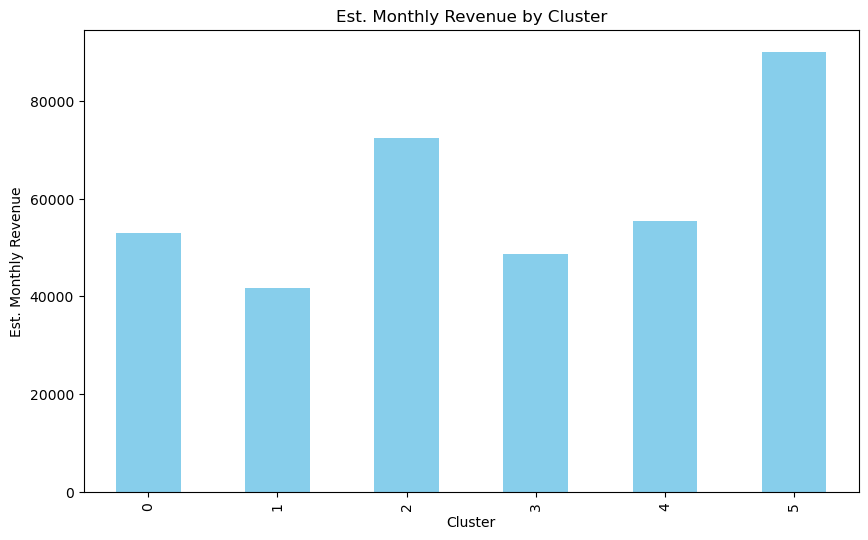

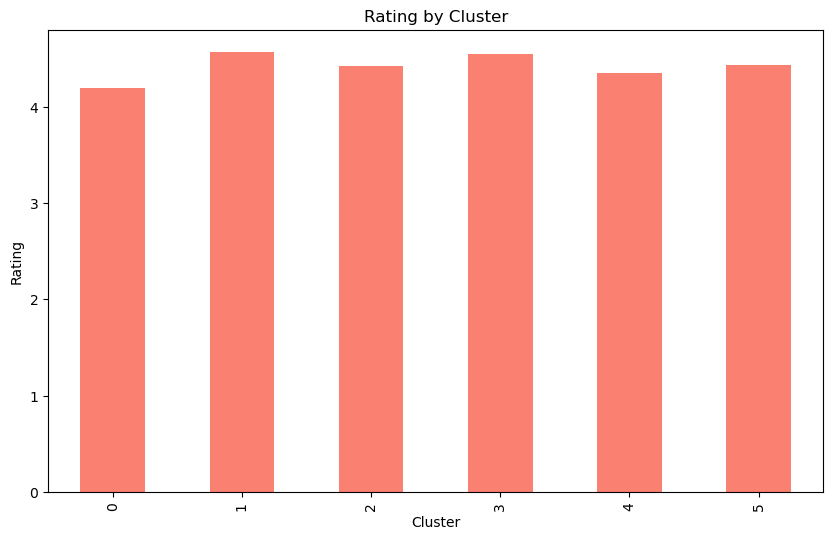

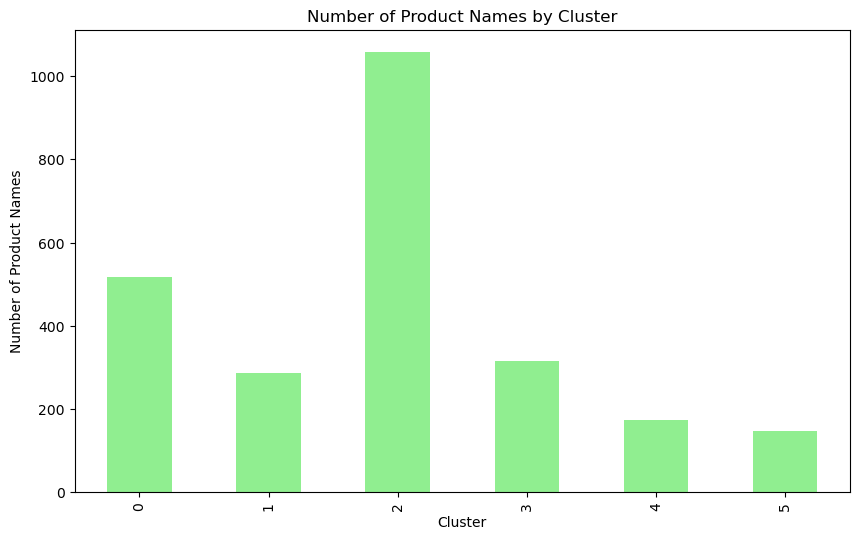

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary_2['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary_2['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary_2['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()

## Análisis de Nichos de Productos de Belleza y Maquillaje

### Cluster 0 - Maquillaje de Ojos y Labios
- **Nicho:** Productos para ojos y labios, incluyendo delineadores, labiales y sombras.
- **Mercado Objetivo:** Consumidores interesados en maquillaje de alta calidad y larga duración.

### Cluster 1 - Bolsas de Viaje y Organizadores de Cosméticos
- **Nicho:** Bolsas y organizadores para cosméticos y productos de belleza.
- **Mercado Objetivo:** Mujeres que buscan soluciones prácticas para organizar y transportar maquillaje.

### Cluster 2 - Productos de Maquillaje Facial y Remoción
- **Nicho:** Artículos para el cuidado de la piel y maquillaje facial.
- **Mercado Objetivo:** Consumidores que buscan desde cuidado de la piel hasta maquillaje temático.

### Cluster 3 - Herramientas para Aplicación de Maquillaje
- **Nicho:** Brochas, esponjas y accesorios para aplicar maquillaje.
- **Mercado Objetivo:** Consumidores que buscan herramientas de calidad para maquillaje.

### Cluster 4 - Pestañas Postizas y Accesorios
- **Nicho:** Pestañas postizas y productos relacionados para realzar la mirada.
- **Mercado Objetivo:** Interesados en pestañas voluminosas y naturales.

### Cluster 5 - Espejos de Maquillaje Iluminados
- **Nicho:** Espejos de maquillaje con características avanzadas como iluminación y aumento.
- **Mercado Objetivo:** Usuarios que requieren espejos funcionales para aplicar maquillaje.


## Busqueda 3 - Mascotas

In [39]:
# Leer el archivo CSV
Busqueda_3 = pd.read_csv('Data/Busqueda_3.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

Busqueda_3

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B079PT7PCP,"""Nature's Pure Edge Yard Odor Eliminator. Perfect For Artificial Grass Patio Kennel and Lawn. Instantly Removes Stool and Urine Odor. Long Lasting. Kid and Pet Safe.",Nature's Pure Edge,Pet Supplies,"$43,973.94","2,202",$19.97,$8.14,$11.83,"3,674",2488,6,1,02/07/2018,Amazon,4.1,"3.68"" x 3.68"" x 7.00""",Large standard-size,1.88 lbs
1,B09YTZLRY4,"(100 Pads) CalPalmy Ultra Absorbency Pet Toilet Training Pads 18"" x 13"" Moisture Locking Technology Turns Liquid into Gel - Perfect for Rabbits and Guinea Pigs",CALPALMY,Pet Supplies,"$34,222.88","1,712",$20.99,$6.77,$14.22,"5,079",1419,7,3,04/19/2020,Amazon,4.2,"8.00"" x 5.00"" x 3.00""",Large standard-size,0.4 lbs
2,B0CL38LKY6,(2 Pack) Hemp Oil for Dogs and Cats - Helps Pets with Anxiety Pain Stress Sleep Arthritis Seizures Relief - Cat Anxiety Relief - Omega 3-6-9 - Pet Hemp Oil Drops Treats - Hip and Joint Support,Pawstopia,Pet Supplies,"$33,526.65","1,689",$19.85,$6.52,$13.33,N.A.,2318,6,1,11/28/2021,Amazon,4.2,"4.69"" x 3.39"" x 1.38""",Large standard-size,5.61 lbs
3,B0C7CDVX7C,(2 Packs) Pet Hemp Oil for Dogs and Cats Anxiety Stress Pain Holistic Inflammation Skin Allergies Relief Joint Hip Ðrthritis Sleep Aid Calming Oil Drop Organic Extract Treats,MaxHemp,Pet Supplies,"$89,719.20","4,080",$19.99,$6.54,$13.45,N.A.,1447.333333,6,2,05/05/2021,Amazon,4.2,"3.86"" x 2.80"" x 1.54""",Large standard-size,5.93 lbs
4,B0BTNTF37Y,---Pet 'n Shape Chik 'n Wrapped Biscuits â Natural Chicken Wrapped Dog Treats - 35 Ounce,Pet 'n Shape,Pet Supplies,"$35,597.70","2,138",$14.32,$8.93,$5.39,"3,620",2358,6,7,07/31/2016,Amazon,4.6,"7.00"" x 7.00"" x 8.75""",Large standard-size,2 lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,B0014HYCM0,Zymox Ear Cleanser With Bio-Active Enzymes 4 oz.,Pet King Brands,Pet Supplies,"$16,575.24","1,276",$12.99,$5.49,$7.50,"11,413",5604,5,6,10/14/2009,Amazon,4.6,"1.50"" x 1.50"" x 6.00""",Large standard-size,4.8 lbs
3300,B07CL28Z3F,ZYMOX Ear Solution,Pet King Brands,Pet Supplies,"$158,218.35","3,165",$49.99,N.A.,N.A.,"2,637",5383,3,1,12/05/2017,Happy Dog Place,4.7,N.A.,N.A.,N.A.
3301,B079RCH14D,Â· Petgrow Â· Cute Banana Cat Bed House Extra Large Size Christmas Soft Cat Cuddle Bed Lovely Pet Supplies for Cats Kittens Rabbit Small Dogs Yellow,Petgrow,Pet Supplies,"$61,389.72","1,428",$32.99,$10.97,$22.02,"10,045",3057,6,1,02/11/2018,Amazon Warehouse,4.3,"15.70"" x 6.70"" x 4.30""",Large standard-size,14.89 lbs
3302,B09J2JLZSN,ãUpgraded Versionã EGETOTA Cat Doors Flap Magnetic Pet Door with 4 Way Locking for Interior Exterior Doors Weatherproof Pet Door for Cats Doggie Kitties & Kittens Easy Installation (Black M),EGETOTA,Pet Supplies,"$17,429.10","1,090",$15.99,$6.17,$9.82,"5,888",326,7,1,11/01/2021,okwf,4.3,"2.36"" x 7.64"" x 8.78""",Large standard-size,0.7055 lbs


In [40]:
Busqueda_3 = Busqueda_3.drop_duplicates(subset='ASIN')

In [41]:
Busqueda_3 = Busqueda_3.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [42]:
# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    Busqueda_3[col] = Busqueda_3[col].astype(str).apply(clean_text)

    
Busqueda_3.replace("N.A.", np.nan, inplace=True)
Busqueda_3.replace("na", np.nan, inplace=True)


In [43]:
# Verificar valores faltantes
missing_values_3 = Busqueda_3.isnull().sum()
print("Datos faltantes por columna:\n", missing_values_3)

Datos faltantes por columna:
 Product Name            0
Brand                   0
Category                0
Est. Monthly Revenue    0
Est. Monthly Sales      0
Price                   0
Reviews                 9
LQS                     0
Sellers                 0
Date First Available    0
Rating                  9
dtype: int64


In [44]:
Busqueda_3 = Busqueda_3.dropna(subset=['Reviews'])
Busqueda_3 = Busqueda_3.dropna(subset=['Rating'])

In [45]:
# Verificar valores faltantes
missing_values_3 = Busqueda_3.isnull().sum()
print("Datos faltantes por columna:\n", missing_values_3)

Datos faltantes por columna:
 Product Name            0
Brand                   0
Category                0
Est. Monthly Revenue    0
Est. Monthly Sales      0
Price                   0
Reviews                 0
LQS                     0
Sellers                 0
Date First Available    0
Rating                  0
dtype: int64


In [46]:
print(Busqueda_3.dtypes)

Product Name            object
Brand                   object
Category                object
Est. Monthly Revenue    object
Est. Monthly Sales      object
Price                   object
Reviews                 object
LQS                      int64
Sellers                  int64
Date First Available    object
Rating                  object
dtype: object


In [47]:
Busqueda_3['Rating'] = pd.to_numeric(Busqueda_3['Rating'], errors='coerce')
Busqueda_3['Rating'] = Busqueda_3['Rating'].round(2)

# Si 'Reviews' contiene decimales, primero convierte a float y luego a int
Busqueda_3['Reviews'] = pd.to_numeric(Busqueda_3['Reviews'], errors='coerce').fillna(0).astype('int64')

Busqueda_3['Est. Monthly Revenue'] = Busqueda_3['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
Busqueda_3['Est. Monthly Sales'] = Busqueda_3['Est. Monthly Sales'].str.replace(',', '')
Busqueda_3['Price'] = Busqueda_3['Price'].str.replace('$', '').str.replace(',', '')

Busqueda_3['Est. Monthly Sales'] = pd.to_numeric(Busqueda_3['Est. Monthly Sales'], errors='coerce')
Busqueda_3['Price'] = pd.to_numeric(Busqueda_3['Price'], errors='coerce')
Busqueda_3['Est. Monthly Revenue'] = pd.to_numeric(Busqueda_3['Est. Monthly Revenue'], errors='coerce')

C:\Users\Chris\AppData\Local\Temp\ipykernel_9380\1357608840.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_3['Est. Monthly Revenue'] = Busqueda_3['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
C:\Users\Chris\AppData\Local\Temp\ipykernel_9380\1357608840.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_3['Price'] = Busqueda_3['Price'].str.replace('$', '').str.replace(',', '')


In [48]:
# Convertir la columna "Date First Available" a formato de fecha
Busqueda_3['Date First Available'] = pd.to_datetime(Busqueda_3['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
Busqueda_3['Time in Market (days)'] = (today - Busqueda_3['Date First Available']).dt.days

In [49]:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
Busqueda_3 = Busqueda_3[ordered_columns]

In [50]:
Busqueda_3

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue
0,natures pure edge yard odor eliminator perfect for artificial grass patio kennel and lawn instantly removes stool and urine odor long lasting kid and pet safe,pet supplies,natures pure edge,2488,6,1,2018-02-07,2109,4.1,19.97,2202.0,43973.94
1,100 pads calpalmy ultra absorbency pet toilet training pads 18 x 13 moisture locking technology turns liquid into gel perfect for rabbits and guinea pigs,pet supplies,calpalmy,1419,7,3,2020-04-19,1307,4.2,20.99,1712.0,34222.88
2,2 pack hemp oil for dogs and cats helps pets with anxiety pain stress sleep arthritis seizures relief cat anxiety relief omega 369 pet hemp oil drops treats hip and joint support,pet supplies,pawstopia,2318,6,1,2021-11-28,719,4.2,19.85,1689.0,33526.65
3,2 packs pet hemp oil for dogs and cats anxiety stress pain holistic inflammation skin allergies relief joint hip arthritis sleep aid calming oil drop organic extract treats,pet supplies,maxhemp,1447,6,2,2021-05-05,926,4.2,19.99,4080.0,89719.20
4,pet n shape chik n wrapped biscuits natural chicken wrapped dog treats 35 ounce,pet supplies,pet n shape,2358,6,7,2016-07-31,2665,4.6,14.32,2138.0,35597.70
...,...,...,...,...,...,...,...,...,...,...,...,...
3299,zymox ear cleanser with bioactive enzymes 4 oz,pet supplies,pet king brands,5604,5,6,2009-10-14,5147,4.6,12.99,1276.0,16575.24
3300,zymox ear solution,pet supplies,pet king brands,5383,3,1,2017-12-05,2173,4.7,49.99,3165.0,158218.35
3301,petgrow cute banana cat bed house extra large size christmas soft cat cuddle bed lovely pet supplies for cats kittens rabbit small dogs yellow,pet supplies,petgrow,3057,6,1,2018-02-11,2105,4.3,32.99,1428.0,61389.72
3302,upgraded version egetota cat doors flap magnetic pet door with 4 way locking for interior exterior doors weatherproof pet door for cats doggie kitties kittens easy installation black m,pet supplies,egetota,326,7,1,2021-11-01,746,4.3,15.99,1090.0,17429.10


## Extraccion de palabras clave

### Agrupación

In [51]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list

In [52]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(Busqueda_3['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
Busqueda_3['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
Busqueda_3['Cluster'] = km.fit_predict(tfidf_matrix)

C:\Users\Chris\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
Busqueda_3

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
0,natures pure edge yard odor eliminator perfect for artificial grass patio kennel and lawn instantly removes stool and urine odor long lasting kid and pet safe,pet supplies,natures pure edge,2488,6,1,2018-02-07,2109,4.1,19.97,2202.0,43973.94,"[odor, instantly, patio, stool, kid, pure, lawn, natures, edge, artificial]",0
1,100 pads calpalmy ultra absorbency pet toilet training pads 18 x 13 moisture locking technology turns liquid into gel perfect for rabbits and guinea pigs,pet supplies,calpalmy,1419,7,3,2020-04-19,1307,4.2,20.99,1712.0,34222.88,"[pads, turns, absorbency, moisture, toilet, technology, gel, liquid, 13, locking]",0
2,2 pack hemp oil for dogs and cats helps pets with anxiety pain stress sleep arthritis seizures relief cat anxiety relief omega 369 pet hemp oil drops treats hip and joint support,pet supplies,pawstopia,2318,6,1,2021-11-28,719,4.2,19.85,1689.0,33526.65,"[hemp, anxiety, oil, relief, 369, seizures, drops, arthritis, hip, helps]",0
3,2 packs pet hemp oil for dogs and cats anxiety stress pain holistic inflammation skin allergies relief joint hip arthritis sleep aid calming oil drop organic extract treats,pet supplies,maxhemp,1447,6,2,2021-05-05,926,4.2,19.99,4080.0,89719.20,"[oil, drop, arthritis, inflammation, allergies, hemp, hip, aid, organic, pain]",0
4,pet n shape chik n wrapped biscuits natural chicken wrapped dog treats 35 ounce,pet supplies,pet n shape,2358,6,7,2016-07-31,2665,4.6,14.32,2138.0,35597.70,"[wrapped, biscuits, chik, 35, shape, ounce, chicken, treats, natural, dog]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,zymox ear cleanser with bioactive enzymes 4 oz,pet supplies,pet king brands,5604,5,6,2009-10-14,5147,4.6,12.99,1276.0,16575.24,"[cleanser, zymox, enzymes, ear, oz, dha, diabetes, diabetic, diameter, diamond]",0
3300,zymox ear solution,pet supplies,pet king brands,5383,3,1,2017-12-05,2173,4.7,49.99,3165.0,158218.35,"[zymox, ear, solution, diaper, dgeagle, dh015xl, dha, diabetes, diabetic, diameter]",0
3301,petgrow cute banana cat bed house extra large size christmas soft cat cuddle bed lovely pet supplies for cats kittens rabbit small dogs yellow,pet supplies,petgrow,3057,6,1,2018-02-11,2105,4.3,32.99,1428.0,61389.72,"[cuddle, lovely, banana, bed, yellow, kittens, rabbit, house, size, christmas]",2
3302,upgraded version egetota cat doors flap magnetic pet door with 4 way locking for interior exterior doors weatherproof pet door for cats doggie kitties kittens easy installation black m,pet supplies,egetota,326,7,1,2021-11-01,746,4.3,15.99,1090.0,17429.10,"[doors, door, egetota, installation, exterior, magnetic, version, kitties, weatherproof, interior]",0


In [54]:
# Identificación de Nichos Rentables
cluster_summary_3 = Busqueda_3.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary_3)

         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0               108315.979323  4.422205          1900
1                40673.943616  4.372058           690
2               134650.985729  4.443966           290
3                82013.149061  4.433149           181
4                86234.889184  4.481351           148
5               153538.856706  4.672791            86


In [55]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:  # Top n palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 dog
 pet
 cat
 food
 dogs
 cats
 grooming
 small
 pads
 large
 toys
 puppy
 hair
 pack
 natural
 carrier
 toy
 bowl
 brush
 nail


Cluster 1:
 dog
 collar
 clothes
 dogs
 small
 harness
 pet
 large
 medium
 adjustable
 vest
 sweater
 costume
 halloween
 puppy
 winter
 soft
 reflective
 warm
 cat


Cluster 2:
 bed
 dog
 washable
 cover
 seat
 beds
 dogs
 waterproof
 large
 crate
 pet
 sofa
 orthopedic
 car
 removable
 blanket
 mat
 couch
 foam
 cat


Cluster 3:
 voyager
 neoprene
 breed
 stepin
 harness
 handle
 leash
 best
 reflective
 combo
 supplies
 medium
 small
 supports
 large
 puppies
 air
 set
 weather
 mesh


Cluster 4:
 fountain
 water
 filters
 cat
 replacement
 dispenser
 filter
 automatic
 pump
 bowl
 steel
 stainless
 pet
 pack
 filtration
 quiet
 dog
 cats
 drinking
 inside


Cluster 5:
 bags
 poop
 waste
 walking
 outdoor
 bag
 plastic
 dispenser
 leak
 doggy
 holder
 travel
 roll
 proof
 replacements
 refuse
 cleanup
 supplies
 tear
 

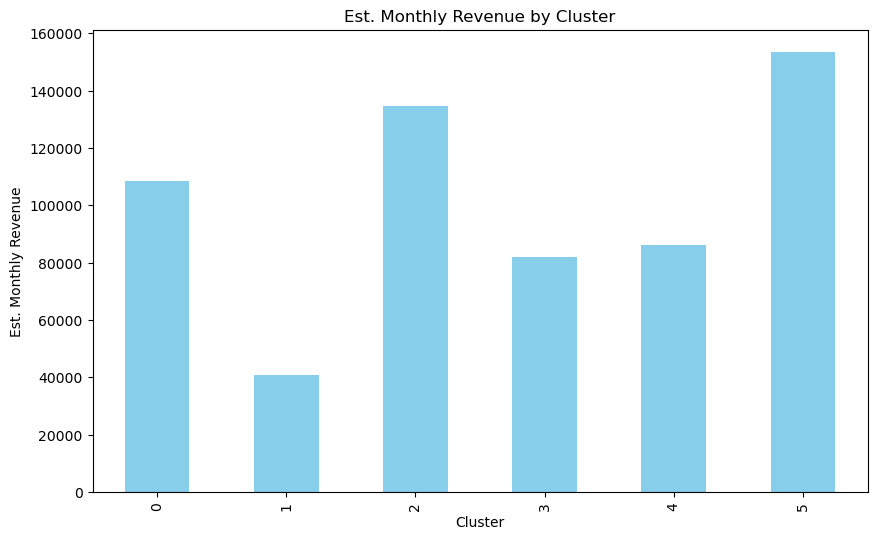

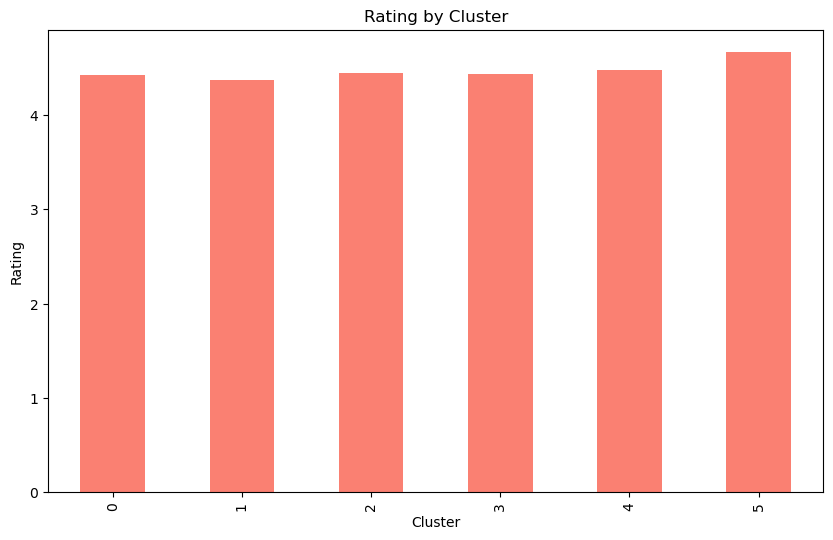

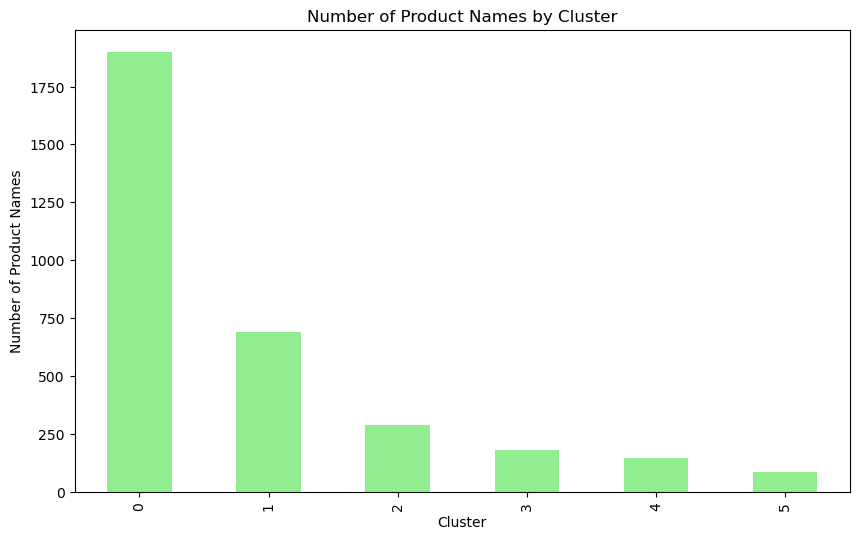

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary_3['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary_3['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary_3['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()

## Análisis de Nichos de Productos para Mascotas

### Cluster 0 - Productos para Mascotas y Aseo
- **Nicho:** Alimentos, juguetes, y artículos de aseo para perros y gatos.
- **Mercado Objetivo:** Dueños de mascotas interesados en el cuidado y bienestar de sus animales.

### Cluster 1 - Accesorios y Ropa para Mascotas
- **Nicho:** Collares, ropa, y arneses para perros y gatos.
- **Mercado Objetivo:** Dueños de mascotas que buscan personalizar y proteger a sus animales.

### Cluster 2 - Artículos de Descanso y Viaje para Mascotas
- **Nicho:** Camas, fundas, y asientos para el descanso y el viaje de las mascotas.
- **Mercado Objetivo:** Dueños que buscan comodidad y seguridad durante el descanso y el transporte de sus mascotas.

### Cluster 3 - Arneses y Accesorios de Paseo
- **Nicho:** Arneses y accesorios para el paseo de mascotas.
- **Mercado Objetivo:** Dueños de mascotas que buscan seguridad y comodidad durante los paseos.

### Cluster 4 - Fuentes de Agua y Filtración
- **Nicho:** Fuentes de agua y filtros para mascotas.
- **Mercado Objetivo:** Dueños que buscan mantener hidratadas a sus mascotas con agua fresca y filtrada.

### Cluster 5 - Artículos de Limpieza y Paseo
- **Nicho:** Bolsas para desechos, dispensadores, y otros artículos para la limpieza durante el paseo.
- **Mercado Objetivo:** Dueños de mascotas que buscan soluciones prácticas y eficientes para la limpieza durante los paseos al aire libre.


## Busqueda 4 - Juguetes

In [57]:
# Leer el archivo CSV
Busqueda_4 = pd.read_csv('Data/Busqueda_4.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

Busqueda_4

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B0BN77V7RR,(60 Pcs) Fidget Toys Fidgets Sensory Toys Pop Its It Party Favors Figette Toy Pack Bulk Box Stress Autism Autistic for Kids Children Boys Girls Adults Gifts Set Mini Carnival Treasure Classroom Prizes,TOMTY,Toys & Games,"$24,167.60","1,240",$19.49,N.A.,N.A.,"11,003",1291,7,6,11/27/2022,Amazon,4.7,N.A.,N.A.,N.A.
1,B0BY3M4469,(6PCS) Magnetic Rings Fidget Toy Set Idea ADHD Fidget Toys Adult Fidget Magnets Spinner Rings for Anxiety Relief Therapy Fidget Pack Great Gift for Adults Teens Kids,Finger Rock,Toys & Games,"$98,219.19","5,781",$9.99,$6.09,$3.90,"1,329",7672.8,7,1,02/06/2021,Amazon Warehouse,4.2,"0.87"" x 4.92"" x 4.96""",Large standard-size,0.1543 lbs
2,B09924V7RZ,(Butterfly Fairy Female Gift) Rainbow Pop Fidget Sensory Toy Pop Bubble Sensory Fidget Toy Human Turtle Butterfly Fairy Bubble Sensory Fidget Toys,Roaqua,Toys & Games,"$15,622.20","1,980",$7.89,$4.72,$3.17,"6,282",68,7,1,04/26/2021,newwaalf,4.7,"1.34"" x 2.60"" x 4.25""",Large standard-size,0.1279 lbs
3,B0CD2BKR5D,1 Year Old Boy Girl Gifts 2 in 1 Toddler Musical Mat Keyboard & Drum Early Educational Learning Musical Toy Piano Mat for Toddlers 1-3 First Birthday Gifts for 1 2 Year Old Girls Boys Presents,Tsomtto,Toys & Games,"$45,842.06","1,994",$22.99,N.A.,N.A.,N.A.,95,7,1,08/02/2023,Amazon,4.5,N.A.,N.A.,N.A.
4,B0CBBJJQRK,1/20 Construction Bulldozer Toy - Kids Toy Engineering Digger Truck Remote Control Hydraulic Toy Car for 6 7 8 9 Year Old Boys Girls Beginner Car Tractor Vehicle Birthday Gifts for Kids,MQDMINI,Toys & Games,"$59,951.50","2,447",$24.15,N.A.,N.A.,"4,501",83,7,2,02/23/2023,Amazon,4.1,N.A.,N.A.,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,B09J4H21NS,ZZHHYY Pop It Purse Shoulder Bag Fidget Toys Rainbow Simple Pop Fidget Bag Toy School Supplies Backpack Silicone Bag Pop for Girls (Butterfly-b),ZZHHYY,Toys & Games,"$82,173.00","6,370",$11.50,N.A.,N.A.,"27,193",1,7,1,10/18/2021,hositor,3,"0.00"" x 0.00"" x 0.00""",N.A.,0 lbs
3052,B0C8N9B8R6,âMattel Jurassic World The Lost World: Jurassic Park Dinosaur Toy Juvenile Tyrannosaurus Rex Hammond Collection Premium Articulated Figure,Mattel,Toys & Games,"$30,934.20","2,580",$11.99,N.A.,N.A.,"2,183",447,6,7,09/30/2023,Amazon Warehouse,4.6,N.A.,N.A.,N.A.
3053,B0BN7RZBST,ã2023 Upgradeã Baby Bath Toys Gifts Rechargeable Whale Baby Toys Light Up Bath Toys for Toddlers Sprinkler Bathtub Toys for Infants Kids 3+ Years Spray Water Bath Toy Pool Bathroom Tub Baby Toy,ANGGIKO,Toys & Games,"$13,007.72","1,628",$8.99,N.A.,N.A.,"11,214",204,7,1,11/23/2022,Amazon,4.4,N.A.,N.A.,N.A.
3054,B08ZH4VRBS,ãRainbow 3-PackãPop up It Push on Pop Buble Fidget Sensory Toy Set Push on Pop Silicone Game Toy Anxiety Stress Reliever Autism Learning Materials for Kids Teens Adults (Coloful),MOZSOY,Toys & Games,"$17,598.26","1,174",$14.99,N.A.,N.A.,"6,934",91,7,1,03/18/2021,US-Fast delivery,4.6,"0.00"" x 0.00"" x 0.00""",N.A.,0 lbs


In [58]:
Busqueda_4 = Busqueda_4.drop_duplicates(subset='ASIN')

In [59]:
Busqueda_4 = Busqueda_4.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [60]:
# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    Busqueda_4[col] = Busqueda_4[col].astype(str).apply(clean_text)

    
Busqueda_4.replace("N.A.", np.nan, inplace=True)
Busqueda_4.replace("na", np.nan, inplace=True)


In [61]:
# Verificar valores faltantes
missing_values_4 = Busqueda_4.isnull().sum()
print("Missing values per column:\n", missing_values_4)

Missing values per column:
 Product Name             0
Brand                    0
Category                 0
Est. Monthly Revenue     0
Est. Monthly Sales       0
Price                    0
Reviews                 15
LQS                      0
Sellers                  0
Date First Available     0
Rating                  15
dtype: int64


### Drop NA

In [62]:
Busqueda_4 = Busqueda_4.dropna(subset=['Reviews'])
Busqueda_4 = Busqueda_4.dropna(subset=['Rating'])

In [63]:
# Verificar valores faltantes
missing_values_4 = Busqueda_4.isnull().sum()
print("Datos faltantes por columna:\n", missing_values_4)

Datos faltantes por columna:
 Product Name            0
Brand                   0
Category                0
Est. Monthly Revenue    0
Est. Monthly Sales      0
Price                   0
Reviews                 0
LQS                     0
Sellers                 0
Date First Available    0
Rating                  0
dtype: int64


In [64]:
print(Busqueda_4.dtypes)

Product Name            object
Brand                   object
Category                object
Est. Monthly Revenue    object
Est. Monthly Sales      object
Price                   object
Reviews                 object
LQS                      int64
Sellers                  int64
Date First Available    object
Rating                  object
dtype: object


In [65]:
Busqueda_4['Rating'] = pd.to_numeric(Busqueda_4['Rating'], errors='coerce')
Busqueda_4['Rating'] = Busqueda_4['Rating'].round(2)

# Si 'Reviews' contiene decimales, primero convierte a float y luego a int
Busqueda_4['Reviews'] = pd.to_numeric(Busqueda_4['Reviews'], errors='coerce').fillna(0).astype('int64')

Busqueda_4['Est. Monthly Revenue'] = Busqueda_4['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
Busqueda_4['Est. Monthly Sales'] = Busqueda_4['Est. Monthly Sales'].str.replace(',', '')
Busqueda_4['Price'] = Busqueda_4['Price'].str.replace('$', '').str.replace(',', '')

Busqueda_4['Est. Monthly Sales'] = pd.to_numeric(Busqueda_4['Est. Monthly Sales'], errors='coerce')
Busqueda_4['Price'] = pd.to_numeric(Busqueda_4['Price'], errors='coerce')
Busqueda_4['Est. Monthly Revenue'] = pd.to_numeric(Busqueda_4['Est. Monthly Revenue'], errors='coerce')

C:\Users\Chris\AppData\Local\Temp\ipykernel_9380\1103365721.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_4['Est. Monthly Revenue'] = Busqueda_4['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
C:\Users\Chris\AppData\Local\Temp\ipykernel_9380\1103365721.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_4['Price'] = Busqueda_4['Price'].str.replace('$', '').str.replace(',', '')


## Calcular tiempo en el mercado por producto

In [66]:
# Convertir la columna "Date First Available" a formato de fecha
Busqueda_4['Date First Available'] = pd.to_datetime(Busqueda_4['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
Busqueda_4['Time in Market (days)'] = (today - Busqueda_4['Date First Available']).dt.days

In [67]:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
Busqueda_4 = Busqueda_4[ordered_columns]

In [68]:
Busqueda_4

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue
0,60 pcs fidget toys fidgets sensory toys pop its it party favors figette toy pack bulk box stress autism autistic for kids children boys girls adults gifts set mini carnival treasure classroom prizes,toys games,tomty,1291,7,6,2022-11-27,355,4.7,19.49,1240.0,24167.60
1,6pcs magnetic rings fidget toy set idea adhd fidget toys adult fidget magnets spinner rings for anxiety relief therapy fidget pack great gift for adults teens kids,toys games,finger rock,7672,7,1,2021-02-06,1014,4.2,9.99,5781.0,98219.19
2,butterfly fairy female gift rainbow pop fidget sensory toy pop bubble sensory fidget toy human turtle butterfly fairy bubble sensory fidget toys,toys games,roaqua,68,7,1,2021-04-26,935,4.7,7.89,1980.0,15622.20
3,1 year old boy girl gifts 2 in 1 toddler musical mat keyboard drum early educational learning musical toy piano mat for toddlers 13 first birthday gifts for 1 2 year old girls boys presents,toys games,tsomtto,95,7,1,2023-08-02,107,4.5,22.99,1994.0,45842.06
4,120 construction bulldozer toy kids toy engineering digger truck remote control hydraulic toy car for 6 7 8 9 year old boys girls beginner car tractor vehicle birthday gifts for kids,toys games,mqdmini,83,7,2,2023-02-23,267,4.1,24.15,2447.0,59951.50
...,...,...,...,...,...,...,...,...,...,...,...,...
3051,zzhhyy pop it purse shoulder bag fidget toys rainbow simple pop fidget bag toy school supplies backpack silicone bag pop for girls butterflyb,toys games,zzhhyy,1,7,1,2021-10-18,760,3.0,11.50,6370.0,82173.00
3052,mattel jurassic world the lost world jurassic park dinosaur toy juvenile tyrannosaurus rex hammond collection premium articulated figure,toys games,mattel,447,6,7,2023-09-30,48,4.6,11.99,2580.0,30934.20
3053,2023 upgrade baby bath toys gifts rechargeable whale baby toys light up bath toys for toddlers sprinkler bathtub toys for infants kids 3+ years spray water bath toy pool bathroom tub baby toy,toys games,anggiko,204,7,1,2022-11-23,359,4.4,8.99,1628.0,13007.72
3054,rainbow 3pack pop up it push on pop buble fidget sensory toy set push on pop silicone game toy anxiety stress reliever autism learning materials for kids teens adults coloful,toys games,mozsoy,91,7,1,2021-03-18,974,4.6,14.99,1174.0,17598.26


## Extracción de Palabras Clave

### Agrupación 

In [69]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list

In [70]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(Busqueda_4['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
Busqueda_4['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
Busqueda_4['Cluster'] = km.fit_predict(tfidf_matrix)

C:\Users\Chris\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [71]:
Busqueda_4

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
0,60 pcs fidget toys fidgets sensory toys pop its it party favors figette toy pack bulk box stress autism autistic for kids children boys girls adults gifts set mini carnival treasure classroom prizes,toys games,tomty,1291,7,6,2022-11-27,355,4.7,19.49,1240.0,24167.60,"[figette, 60, treasure, autistic, fidgets, carnival, prizes, bulk, classroom, box]",4
1,6pcs magnetic rings fidget toy set idea adhd fidget toys adult fidget magnets spinner rings for anxiety relief therapy fidget pack great gift for adults teens kids,toys games,finger rock,7672,7,1,2021-02-06,1014,4.2,9.99,5781.0,98219.19,"[rings, fidget, 6pcs, therapy, magnets, idea, spinner, teens, adult, adhd]",1
2,butterfly fairy female gift rainbow pop fidget sensory toy pop bubble sensory fidget toy human turtle butterfly fairy bubble sensory fidget toys,toys games,roaqua,68,7,1,2021-04-26,935,4.7,7.89,1980.0,15622.20,"[butterfly, fairy, sensory, fidget, human, turtle, bubble, pop, rainbow, gift]",5
3,1 year old boy girl gifts 2 in 1 toddler musical mat keyboard drum early educational learning musical toy piano mat for toddlers 13 first birthday gifts for 1 2 year old girls boys presents,toys games,tsomtto,95,7,1,2023-08-02,107,4.5,22.99,1994.0,45842.06,"[mat, musical, drum, presents, piano, year, keyboard, gifts, old, early]",2
4,120 construction bulldozer toy kids toy engineering digger truck remote control hydraulic toy car for 6 7 8 9 year old boys girls beginner car tractor vehicle birthday gifts for kids,toys games,mqdmini,83,7,2,2023-02-23,267,4.1,24.15,2447.0,59951.50,"[car, beginner, digger, bulldozer, 120, engineering, tractor, vehicle, remote, control]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,zzhhyy pop it purse shoulder bag fidget toys rainbow simple pop fidget bag toy school supplies backpack silicone bag pop for girls butterflyb,toys games,zzhhyy,1,7,1,2021-10-18,760,3.0,11.50,6370.0,82173.00,"[bag, pop, butterflyb, backpack, shoulder, purse, school, fidget, simple, supplies]",5
3052,mattel jurassic world the lost world jurassic park dinosaur toy juvenile tyrannosaurus rex hammond collection premium articulated figure,toys games,mattel,447,6,7,2023-09-30,48,4.6,11.99,2580.0,30934.20,"[jurassic, world, hammond, lost, tyrannosaurus, rex, park, articulated, mattel, premium]",3
3053,2023 upgrade baby bath toys gifts rechargeable whale baby toys light up bath toys for toddlers sprinkler bathtub toys for infants kids 3+ years spray water bath toy pool bathroom tub baby toy,toys games,anggiko,204,7,1,2022-11-23,359,4.4,8.99,1628.0,13007.72,"[bath, baby, toys, whale, sprinkler, spray, upgrade, bathroom, tub, 2023]",2
3054,rainbow 3pack pop up it push on pop buble fidget sensory toy set push on pop silicone game toy anxiety stress reliever autism learning materials for kids teens adults coloful,toys games,mozsoy,91,7,1,2021-03-18,974,4.6,14.99,1174.0,17598.26,"[pop, coloful, buble, materials, 3pack, push, teens, rainbow, reliever, silicone]",5


In [72]:
# Identificación de Nichos Rentables
cluster_summary_4 = Busqueda_4.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary_4)

         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0                50131.489109  4.560909           253
1                36883.363526  4.394133           196
2                76357.271579  4.472220           518
3                70603.863513  4.519333          1514
4                43232.669239  4.489135           185
5                26094.954338  4.551018           275


In [73]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:  # Top n palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 plush
 stuffed
 animal
 soft
 cat
 pillow
 official
 cute
 toy
 animals
 inch
 kellytoy
 squishmallows
 doll
 halloween
 squishy
 plushies
 plushie
 kids
 gift


Cluster 1:
 fidget
 pack
 stress
 sensory
 toys
 adults
 relief
 anxiety
 toy
 simple
 set
 dimple
 packs
 kids
 cube
 cheap
 pop
 antianxiety
 hand
 tube


Cluster 2:
 toys
 old
 year
 boys
 girls
 baby
 birthday
 toy
 gifts
 toddler
 kids
 toddlers
 car
 montessori
 learning
 gift
 educational
 boy
 girl
 board


Cluster 3:
 toy
 kids
 ages
 play
 set
 girls
 toys
 boys
 baby
 toddler
 gift
 toddlers
 pretend
 learning
 years
 building
 educational
 kit
 bath
 playset


Cluster 4:
 party
 favors
 halloween
 stuffers
 prizes
 toys
 classroom
 bag
 goodie
 bulk
 mini
 kids
 pack
 stress
 birthday
 fillers
 pcs
 squishy
 toy
 mochi


Cluster 5:
 pop
 fidget
 push
 bubble
 stress
 sensory
 autism
 silicone
 reliever
 toy
 special
 relief
 adults
 toys
 squeeze
 needs
 anxiety
 kids
 rainbow
 po

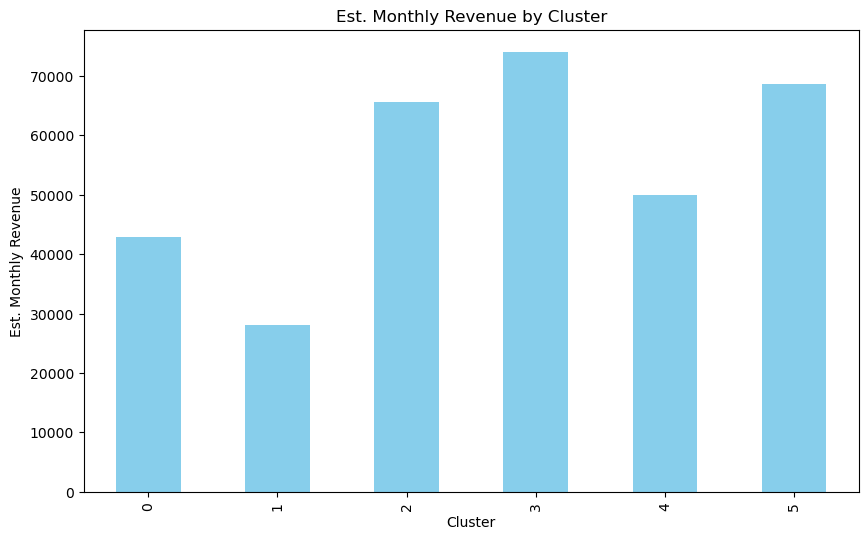

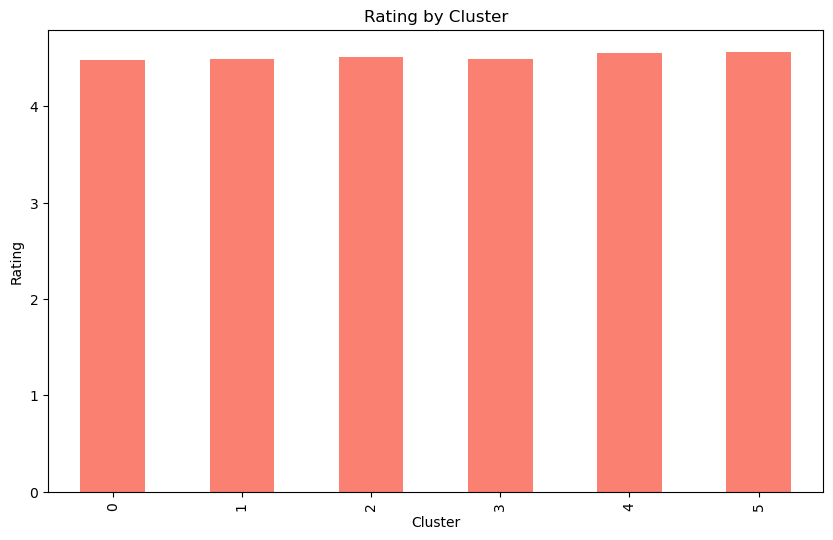

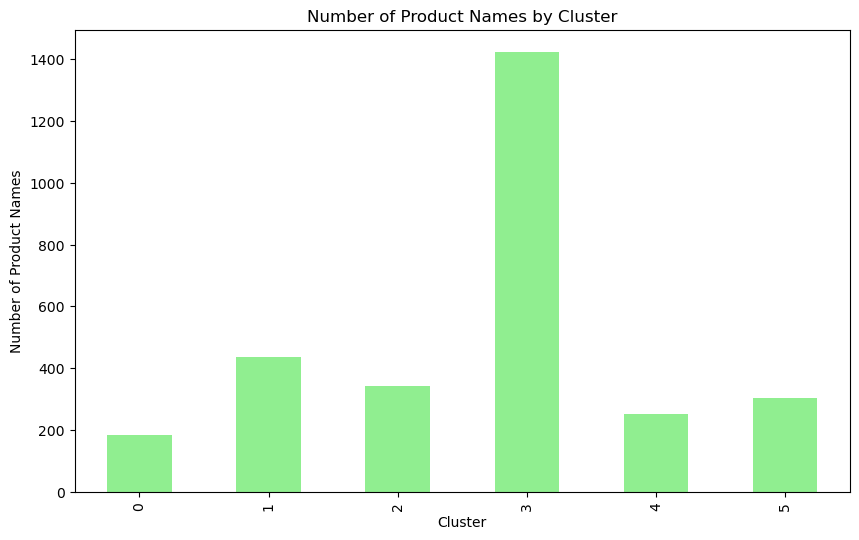

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary_4['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary_4['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary_4['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()

## Análisis de Nichos de juguetes

### Cluster 0 - Juguetes de Peluche y Coleccionables
- **Nicho:** Juguetes de peluche, muñecos suaves, y almohadas con diseños de animales.
- **Mercado Objetivo:** Coleccionistas, niños, regalos temáticos.

### Cluster 1 - Juguetes Sensoriales y de Alivio de Estrés
- **Nicho:** Juguetes como fidget spinners y cubos para alivio de estrés y ansiedad.
- **Mercado Objetivo:** Adultos, niños, personas con necesidades especiales.

### Cluster 2 - Juguetes Educativos para Niños Pequeños
- **Nicho:** Juguetes para niños de diferentes edades, enfocados en el aprendizaje y desarrollo.
- **Mercado Objetivo:** Bebés, niños pequeños, regalos educativos de cumpleaños.

### Cluster 3 - Juguetes Versátiles para Todas las Edades
- **Nicho:** Juguetes educativos, de construcción, y de juego de roles.
- **Mercado Objetivo:** Amplio rango de edades, desde bebés hasta niños mayores.

### Cluster 4 - Juguetes para Fiestas y Eventos
- **Nicho:** Juguetes pequeños y económicos para fiestas y eventos.
- **Mercado Objetivo:** Fiestas, premios de clase, rellenos de bolsas de regalo.

### Cluster 5 - Juguetes Sensoriales para Necesidades Especiales
- **Nicho:** Juguetes sensoriales y de alivio de estrés para necesidades especiales.
- **Mercado Objetivo:** Personas con necesidades especiales, incluyendo autismo.


# Conclusiones

En este proyecto, se utilizaron cuatro datasets recolectados mediante web scraping para identificar nichos de mercado en la plataforma de ventas de Amazon. Cada dataset se centró en productos de diferentes categorías y tuvo como objetivo encontrar nichos rentables dentro de esas categorías.

En el primer dataset, que incluía productos de diversas categorías, se identificaron seis nichos rentables, como productos para bebés y niños, disfraces y accesorios para eventos especiales, bolsas y organizadores de almacenamiento, productos de cuidado personal y del hogar, calzado y zapatos, y productos de cama y descanso.

Luego, en los otros tres datasets, que se enfocaron en industrias específicas, se encontraron al menos cuatro nichos rentables en cada uno de ellos. Estos nichos incluyeron productos relacionados con el maquillaje y la belleza de ojos, espejos de maquillaje iluminados, herramientas y cepillos de maquillaje, maquillaje artístico y de fantasía, bolsos y organizadores de maquillaje de viaje, cuidado de la piel y productos de limpieza, productos para el descanso de mascotas, ropa y accesorios para mascotas en clima frío, equipamiento para paseo y control de mascotas, productos para la alimentación y cuidado de mascotas, fuentes de agua automáticas para mascotas, y arnés y accesorios para paseos de mascotas.

Estos nichos representan oportunidades de mercado en las áreas de juguetes, belleza, cuidado de mascotas y otras categorías específicas. Cada nicho tiene un público objetivo definido y ofrece la posibilidad de satisfacer sus necesidades y deseos específicos.

En resumen, el proyecto ha permitido identificar nichos rentables en diferentes categorías de productos, lo que puede ser útil para estrategias de marketing, desarrollo de productos y toma de decisiones comerciales para la venta de productos en linea. 